<a href="https://colab.research.google.com/github/nicobotti91/coderds/blob/main/etapas_basicas_dsii_botti_1er_entrega_testDSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**




**Abstracto con Motivación y Audiencia**

Motivación del proyecto: Optimizar las estrategias comerciales y de marketing

*   Tomar decisiones estratégicas informadas sobre productos, precios, promociones y gestión de inventario.
*   Encontrar habitos de compra
*   Comprender mejor el comportamiento y las preferencias de los clientes para personalizar las estrategias de marketing y mejorar la experiencia del cliente.
*   Identificar oportunidades de crecimiento y áreas de mejora en las operaciones comerciales.


Audiencia: Gerentes de departamentos de negocio, marketing y compras.

**Contexto Comercial y Analítico**

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

---

**Características de los clientes:** ¿Cuál es la distribución demográfica de los clientes (edad, género, ingresos)? ¿Cómo se distribuyen geográficamente los clientes? ¿Cuáles son los principales segmentos de clientes?

**Patrones de compra:** ¿Cuáles son los productos más vendidos y las categorías de productos más populares? ¿Cuáles son las marcas con mejor desempeño? ¿Hay patrones estacionales o temporales en las ventas? ¿Cuál es el valor promedio de las transacciones?

**Comportamiento del cliente:** ¿Cuántas compras realiza un cliente promedio? ¿Cuál es el gasto total por cliente? ¿Cómo varía el comportamiento de compra entre los diferentes segmentos de clientes?

**Feedback y satisfacción del cliente**: ¿Cuál es la distribución de los ratings y
feedback de los productos/transacciones? ¿Hay alguna correlación entre el feedback y otras variables (por ejemplo, categoría de producto, marca)?

**Eficiencia operativa**: ¿Cuáles son los métodos de envío y pago más utilizados? ¿Cuál es el estado típico de las órdenes?

**Objetivo**

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Configuración del entorno de Python en Google Colab**

**Lectura del dataset**

In [6]:
df_orders = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/orders.csv')

In [7]:
df_order_items = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/order_items.csv')

In [8]:
df_products = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/products.csv')

In [9]:
df_sellers = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/sellers.csv')

In [10]:
df_geolocation = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/geolocation.csv')

In [11]:
df_payments = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/payments.csv')

In [12]:
df_customers = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/customers.csv')

In [13]:
df_merged_v1 =  df_orders.merge(
    df_order_items,
    how ='inner',
    on= 'order_id'
)

In [14]:
df_merged_v2 =  df_merged_v1.merge(
    df_products,
    how ='inner',
    on= 'product_id'
)

In [15]:
df_merged_v3 =  df_merged_v2.merge(
    df_sellers,
    how ='inner',
    on= 'seller_id'
)


In [16]:
df_merged_v4 =  df_merged_v3.merge(
    df_geolocation,
    how ='left',
    left_on= 'seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)
df_merged_v4.rename(columns={'geolocation_lat': 'seller_lat', 'geolocation_lng': 'seller_lng'}, inplace=True)

In [ ]:
df_merged_v5 =  df_merged_v4.merge(
    df_payments,
    how ='left',
    on= 'order_id'
)

In [3]:
df_merged_v6 = df_merged_v5.merge(
    df_customers,
    how ='inner',
    on= 'customer_id'
)

NameError: name 'df_merged_v5' is not defined

In [13]:
df_merged_total =  df_merge_v4.merge(
    df_customers,
    how ='inner',
    on= 'customer_id'
)
df_merged_total.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,belo horizonte,SP,1,UPI,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,guariba,SP,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


**Análisis inicial del dataset**

In [ ]:
# tamaño del Dataframe
df_original.shape

(302010, 30)

In [ ]:
# Miramos con info las distintas columnas, la cantidad de valores no nulos y el formato que tiene cada una
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

El dataset se compone de 30 columnas y 302k filas

*   Se detecta que las columnas relacionadas a fechas está en formato object o float64 y habrá que pasarlas a datetime

In [ ]:
# Miramos con describe la cantidad de valores, la media, min, máx y los quartiles
df_original.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


Las columnas Transaction_ID, Customer_ID, Phone, ZipCode y Year no tiene sentido analizarlas en el describe ya que son categóricas nominales (salvo Year que es categórica ordinal)

In [ ]:
# Revisamos primeras 5 filas del DF
df_original.head(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [ ]:
# Revisamos últimas 5 filas del DF
df_original.tail(5)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,...,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,...,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,...,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,...,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand
302009,2882826.0,53626.0,Dustin Merritt,William14@gmail.com,9.518927e+09,143 Amanda Crescent,Tucson,West Virginia,25242.0,USA,...,2382.233417,Home Decor,Home Depot,Decorations,Average,Same-Day,Cash,Shipped,2.0,Clocks


**Descripción de variables**

In [ ]:
#definimos una variable el diccionario de variables que tenemos en el DataFrame
ref_variables_dict = {
    'Transaction_ID': {'Descripción': 'Identificador único de la transacción.', 'Tipo': 'Categórica nominal'},
    'Customer_ID': {'Descripción': 'Identificador único del cliente.', 'Tipo': 'Categórica nominal'},
    'Name': {'Descripción': 'Nombre del cliente.', 'Tipo': 'Categórica nominal'},
    'Email': {'Descripción': 'Correo electrónico del cliente.', 'Tipo': 'Categórica nominal'},
    'Phone': {'Descripción': 'Número de teléfono del cliente.', 'Tipo': 'Categórica nominal'},
    'Address': {'Descripción': 'Dirección del cliente.', 'Tipo': 'Categórica nominal'},
    'City': {'Descripción': 'Ciudad del cliente.', 'Tipo': 'Categórica nominal'},
    'State': {'Descripción': 'Estado del cliente.', 'Tipo': 'Categórica nominal'},
    'Zipcode': {'Descripción': 'Código postal del cliente.', 'Tipo': 'Categórica nominal'},
    'Country': {'Descripción': 'País del cliente.', 'Tipo': 'Categórica nominal'},
    'Age': {'Descripción': 'Edad del cliente.', 'Tipo': 'Numérica continua'},
    'Gender': {'Descripción': 'Género del cliente.', 'Tipo': 'Categórica nominal'},
    'Income': {'Descripción': 'Nivel de ingresos del cliente.', 'Tipo': 'Categórica ordinal'},
    'Customer_Segment': {'Descripción': 'Segmento del cliente.', 'Tipo': 'Categórica nominal'},
    'Date': {'Descripción': 'Fecha de la transacción.', 'Tipo': 'Categórica ordinal (fecha)'},
    'Year': {'Descripción': 'Año de la transacción.', 'Tipo': 'Categórica ordinal'},
    'Month': {'Descripción': 'Mes de la transacción.', 'Tipo': 'Categórica ordinal'},
    'Time': {'Descripción': 'Hora de la transacción.', 'Tipo': 'Categórica ordinal (hora)'},
    'Total_Purchases': {'Descripción': 'Número total de compras del cliente.', 'Tipo': 'Numérica discreta (ordinal)'},
    'Amount': {'Descripción': 'Cantidad del producto en la transacción.', 'Tipo': 'Numérica continua'},
    'Total_Amount': {'Descripción': 'Monto total de la transacción.', 'Tipo': 'Numérica continua'},
    'Product_Category': {'Descripción': 'Categoría del producto.', 'Tipo': 'Categórica nominal'},
    'Product_Brand': {'Descripción': 'Marca del producto.', 'Tipo': 'Categórica nominal'},
    'Product_Type': {'Descripción': 'Tipo de producto.', 'Tipo': 'Categórica nominal'},
    'Feedback': {'Descripción': 'Feedback del cliente sobre la transacción.', 'Tipo': 'Categórica ordinal'},
    'Shipping_Method': {'Descripción': 'Método de envío utilizado.', 'Tipo': 'Categórica nominal'},
    'Payment_Method': {'Descripción': 'Método de pago utilizado.', 'Tipo': 'Categórica nominal'},
    'Order_Status': {'Descripción': 'Estado de la orden.', 'Tipo': 'Categórica nominal'},
    'Ratings': {'Descripción': 'Calificación del producto/transacción.', 'Tipo': 'Numérica discreta (ordinal)'},
    'products': {'Descripción': 'Nombre específico del producto.', 'Tipo': 'Categórica nominal'}
}

ref_variables = pd.DataFrame.from_dict(ref_variables_dict, orient='index')
ref_variables.index.name = 'Variable'

display(ref_variables.reset_index())

,Variable,Descripción,Tipo
0,Transaction_ID,Identificador único de la transacción.,Categórica nominal
1,Customer_ID,Identificador único del cliente.,Categórica nominal
2,Name,Nombre del cliente.,Categórica nominal
3,Email,Correo electrónico del cliente.,Categórica nominal
4,Phone,Número de teléfono del cliente.,Categórica nominal
5,Address,Dirección del cliente.,Categórica nominal
6,City,Ciudad del cliente.,Categórica nominal
7,State,Estado del cliente.,Categórica nominal
8,Zipcode,Código postal del cliente.,Categórica nominal
9,Country,País del cliente.,Categórica nominal


In [ ]:
# Analizar los valores de las variables object
df_original.select_dtypes(include=['object']).apply(pd.unique)

,0
Name,"[Michelle Harrington, Kelsey Hill, Scott Jense..."
Email,"[Ebony39@gmail.com, Mark36@gmail.com, Shane85@..."
Address,"[3959 Amanda Burgs, 82072 Dawn Centers, 4133 Y..."
City,"[Dortmund, Nottingham, Geelong, Edmonton, Bris..."
State,"[Berlin, England, New South Wales, Ontario, Vi..."
Country,"[Germany, UK, Australia, Canada, USA, nan]"
Gender,"[Male, Female, nan]"
Income,"[Low, High, Medium, nan]"
Customer_Segment,"[Regular, Premium, New, nan]"
Date,"[9/18/2023, 12/31/2023, 4/26/2023, 05-08-23, 0..."


# **Data Wrangling - Limpieza y transformación de datos**

**Valores duplicados**

In [ ]:
# Idetnificar cuantas filas están duplicadas
df_original.duplicated().sum()

np.int64(4)

Se detectan 4 filas duplicadas en el Dataset original

**Valores nulos**

In [ ]:
# Identificar cuantos valores nulos hay por columna
df_original.isnull().sum()

,0
Transaction_ID,333
Customer_ID,308
Name,382
Email,347
Phone,362
Address,315
City,248
State,281
Zipcode,340
Country,271


In [ ]:
# Calculo que % de valores nulos representa sobre el total de cada variable
nulos_por_variable = df_original.isnull()
cantidad_nulos_por_variable = nulos_por_variable.sum() # Sumamos los valores booleanos para obtener la cantidad de nulos por variable
variables_con_nulos = cantidad_nulos_por_variable[cantidad_nulos_por_variable > 0] # Filtramos solo las variables con al menos un valor nulo
lista_variables_con_nulos = variables_con_nulos.index.tolist() # Convertimos a lista

for variable in lista_variables_con_nulos:
    cantidad_nulos = cantidad_nulos_por_variable[variable]
    porcentaje_nulos = (cantidad_nulos / len(df_original)) * 100
    print(f"Variable: {variable}, Cantidad de Nulos: {cantidad_nulos}, Porcentaje: {porcentaje_nulos:.2f}%")

Variable: Transaction_ID, Cantidad de Nulos: 333, Porcentaje: 0.11%
Variable: Customer_ID, Cantidad de Nulos: 308, Porcentaje: 0.10%
Variable: Name, Cantidad de Nulos: 382, Porcentaje: 0.13%
Variable: Email, Cantidad de Nulos: 347, Porcentaje: 0.11%
Variable: Phone, Cantidad de Nulos: 362, Porcentaje: 0.12%
Variable: Address, Cantidad de Nulos: 315, Porcentaje: 0.10%
Variable: City, Cantidad de Nulos: 248, Porcentaje: 0.08%
Variable: State, Cantidad de Nulos: 281, Porcentaje: 0.09%
Variable: Zipcode, Cantidad de Nulos: 340, Porcentaje: 0.11%
Variable: Country, Cantidad de Nulos: 271, Porcentaje: 0.09%
Variable: Age, Cantidad de Nulos: 173, Porcentaje: 0.06%
Variable: Gender, Cantidad de Nulos: 317, Porcentaje: 0.10%
Variable: Income, Cantidad de Nulos: 290, Porcentaje: 0.10%
Variable: Customer_Segment, Cantidad de Nulos: 215, Porcentaje: 0.07%
Variable: Date, Cantidad de Nulos: 359, Porcentaje: 0.12%
Variable: Year, Cantidad de Nulos: 350, Porcentaje: 0.12%
Variable: Month, Cantidad de

Observamos que el % de valores nulos por varialbe es muy bajo, la que tiene mayor valores nulos es nombre con 382, por lo que procederemos a eliminar las filas

In [ ]:
#Eliminar las filas duplicadas
df_original.drop_duplicates(inplace=True)

In [ ]:
# Eliminar las filas con valores nulos
df_original = df_original.dropna()

**Tratamiento de valores outliers**

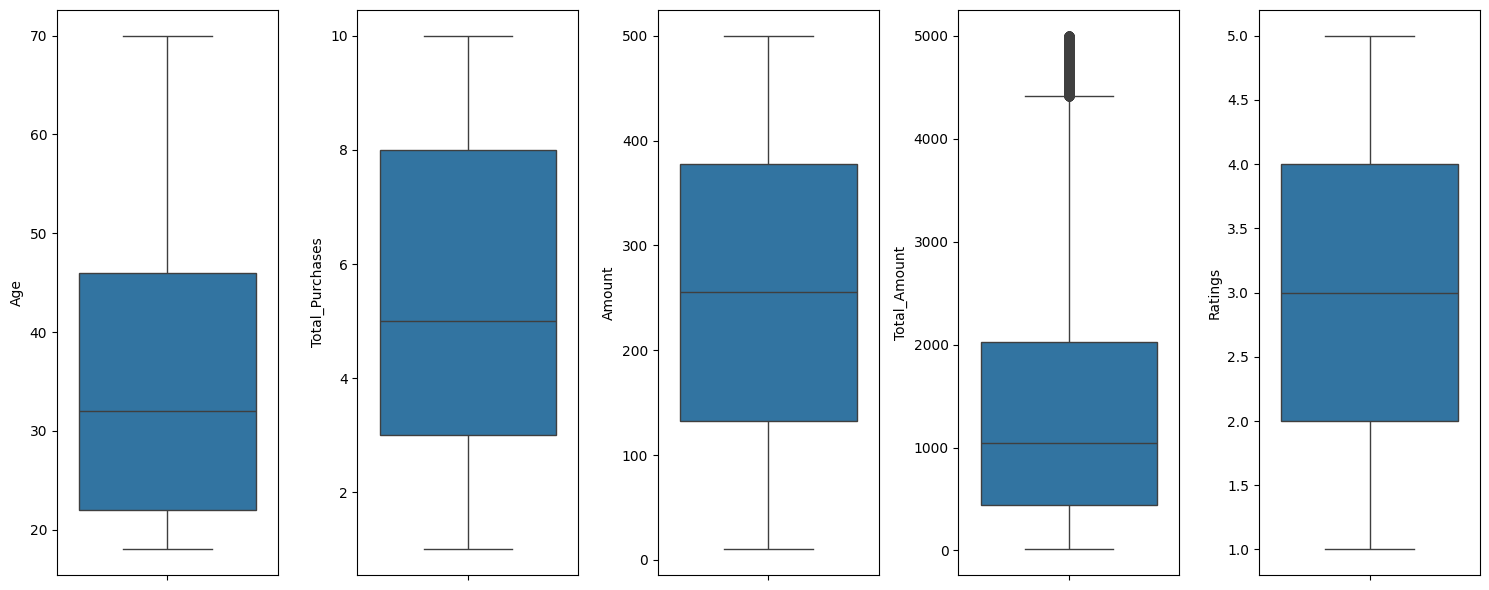

In [ ]:
variables = ['Age', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df_original, ax=ax)
plt.tight_layout()

In [ ]:
# Generación del DF con outliers para análisis basandonos en el rango intercuartil
Q1 = df_original['Total_Amount'].quantile(0.25)
Q3 = df_original['Total_Amount'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_original_outliers = df_original[(df_original['Total_Amount'] <= limite_inferior) | (df_original['Total_Amount'] >= limite_superior)]
df_original_outliers



,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
150,4613625.0,72950.0,Gregory Bates,Gerald65@gmail.com,7.785500e+09,3720 Matthew Ville Suite 453,Portsmouth,England,42573.0,UK,...,4885.287161,Electronics,Samsung,Television,Average,Same-Day,Debit Card,Pending,2.0,Android TV
159,8093529.0,45413.0,Lauren Johnson,Lisa82@gmail.com,1.816017e+09,0288 Jennifer Spurs Suite 207,Portsmouth,England,24786.0,UK,...,4850.773617,Books,Penguin Books,Children's,Bad,Standard,Debit Card,Delivered,1.0,Art supplies
395,5777205.0,20280.0,Patrick Joseph,Mary8@gmail.com,5.713763e+09,5914 Vargas Loop Apt. 416,Portsmouth,England,4681.0,UK,...,4487.127690,Clothing,Zara,Jeans,Average,Same-Day,Debit Card,Delivered,2.0,Distressed jeans
400,4669285.0,64275.0,Mrs. Taylor Dixon,Alexandra85@gmail.com,4.173398e+09,7386 Delacruz Lock,Portsmouth,England,47009.0,UK,...,4518.677874,Grocery,Pepsi,Juice,Good,Standard,Credit Card,Processing,3.0,Grapefruit juice
484,9627400.0,97549.0,Brady Stanley,Jordan16@gmail.com,6.532213e+09,9574 Heath Points Apt. 765,Portsmouth,England,10616.0,UK,...,4755.346608,Books,Penguin Books,Non-Fiction,Bad,Same-Day,Cash,Delivered,1.0,History
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301721,5518811.0,61956.0,Elizabeth Gaines,Bradley4@gmail.com,4.366713e+09,44193 Shane Field,Liverpool,England,24996.0,UK,...,4640.315599,Clothing,Adidas,Jacket,Bad,Standard,Cash,Pending,1.0,Blazer
301723,7612722.0,91060.0,Michael Sherman,Zoe36@gmail.com,3.115345e+09,923 Eric Mission Apt. 706,Berlin,Berlin,96496.0,Germany,...,4773.836796,Grocery,Coca-Cola,Water,Average,Same-Day,Cash,Pending,2.0,Mineral water
301766,2173333.0,31082.0,Mr. Martin Williams,Karen4@gmail.com,1.097862e+09,95272 Castillo Islands,Plymouth,England,86920.0,UK,...,4802.759630,Home Decor,IKEA,Lighting,Excellent,Same-Day,Cash,Pending,5.0,Floor lamps
301904,8626872.0,62191.0,Chad Stewart,Jesus15@gmail.com,5.251720e+09,5608 Ariana Roads,Southampton,England,30775.0,UK,...,4884.033570,Home Decor,Bed Bath & Beyond,Bedding,Average,Standard,Cash,Delivered,2.0,Comforter


In [ ]:
df_original[(df_original['Product_Brand'] == 'Adidas') & (df_original['products'] == 'Blazer')]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
218,6532646.0,22191.0,Jose Diaz,Julian98@gmail.com,7.905836e+09,6902 Nancy Crossing Suite 179,Portsmouth,England,89921.0,UK,...,1641.687860,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Blazer
239,9858337.0,29333.0,Justin Jackson,Barbara12@gmail.com,4.423586e+09,042 Katie Underpass Suite 931,Portsmouth,England,56061.0,UK,...,147.158287,Clothing,Adidas,Jacket,Good,Same-Day,Credit Card,Delivered,3.0,Blazer
289,3258024.0,92619.0,Alex Medina,John85@gmail.com,6.735971e+09,608 Burton Spurs Apt. 380,Portsmouth,England,39599.0,UK,...,1555.387334,Clothing,Adidas,Jacket,Good,Same-Day,Credit Card,Shipped,3.0,Blazer
644,5799442.0,47157.0,Vincent Smith,Jeremy90@gmail.com,1.891228e+09,0450 Sarah Lake Apt. 764,Portsmouth,England,89727.0,UK,...,291.715955,Clothing,Adidas,Jacket,Bad,Express,Debit Card,Delivered,1.0,Blazer
1497,5969211.0,43372.0,Steven Berg,Michael51@gmail.com,7.883380e+09,925 Mark Mall Apt. 430,Portsmouth,England,31849.0,UK,...,770.642065,Clothing,Adidas,Jacket,Bad,Standard,PayPal,Pending,1.0,Blazer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299999,4229614.0,45975.0,Thomas Whitaker,Latoya72@gmail.com,2.081974e+09,45499 Barrera Square,Leicester,England,9796.0,UK,...,2234.035659,Clothing,Adidas,Jacket,Good,Express,Credit Card,Delivered,3.0,Blazer
300479,1985547.0,98306.0,Scott Harris,Raymond2@gmail.com,1.500414e+09,127 Joseph Ports Apt. 024,Newcastle,New South Wales,73848.0,Australia,...,1159.735704,Clothing,Adidas,Jacket,Average,Same-Day,Credit Card,Processing,2.0,Blazer
300499,4242792.0,88699.0,Kristen Williams,Paula4@gmail.com,4.318336e+09,586 Perez Lodge,Chicago,Maryland,20967.0,USA,...,3604.029773,Clothing,Adidas,Jacket,Bad,Standard,Credit Card,Delivered,1.0,Blazer
300526,2680462.0,50621.0,Jennifer Townsend,Dana59@gmail.com,9.319438e+09,05798 Parker Common,Geelong,New South Wales,84015.0,Australia,...,1636.477650,Clothing,Adidas,Jacket,Average,Same-Day,Credit Card,Shipped,2.0,Blazer


**Otras transformaciones, normalización, fechas**

# **Análisis Exploratorio de datos**

**Análisis univariado**

**Análisis bivariado**

**Análisis multivariado**

**Conclusiones del EDA**

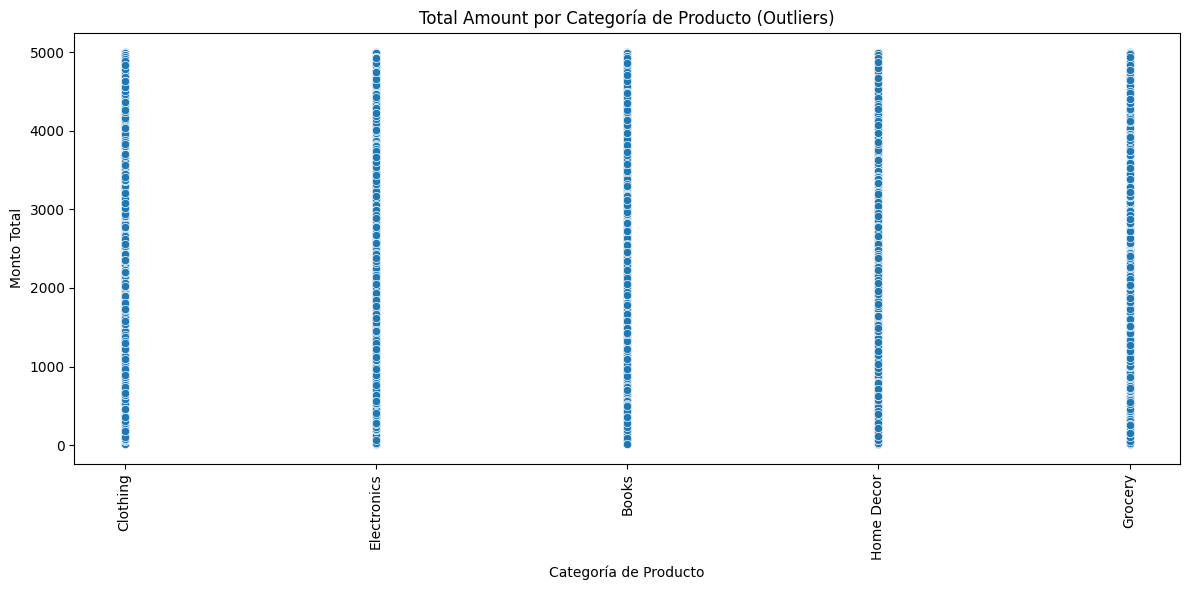

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6)) # Ajusta el tamaño de la figura si es necesario
sns.scatterplot(data=df_original, x='Product_Category', y='Total_Amount')

# Rotar las etiquetas del eje x para mejor legibilidad si hay muchas categorías
plt.xticks(rotation=90)

plt.title('Total Amount por Categoría de Producto (Outliers)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Monto Total')

plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se corten
plt.show()